# House Price Predcition
Training Data Set and Test Data Set are present in Datasets Folder

In [1]:
library(ggplot2)
# install.packages("mlbench")
# install.packages("Amelia")
library(mlbench)
library(Amelia)

Loading required package: Rcpp
Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone 'zone/tz/2018c.1.0/zoneinfo/Asia/Kolkata'”## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


## Reading Training DS
Reading file contents and getting the summary of all the columns

In [2]:
main_file_path = 'Datasets/train.csv'
reqd.train.file = read.csv(main_file_path, header = T, sep = ",")
head(reqd.train.file)
summary(reqd.train.file)
colnames(reqd.train.file)
str(reqd.train.file)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


       Id           MSSubClass       MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.0   C (all):  10   Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   RH     :  16   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9   RL     :1151   Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                  Max.   :313.00  
                                                 NA's   :259     
    LotArea        Street      Alley      LotShape  LandContour  Utilities   
 Min.   :  1300   Grvl:   6   Grvl:  50   IR1:484   Bnk:  63    AllPub:1459  
 1st Qu.:  7554   Pave:1454   Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1  
 Median :  9478               NA's:1369   IR3: 10   Low:  36                 
 Mean   : 10517                           Reg:925   Lvl:1311                 
 3rd Qu.: 11602                                                              
 Max

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..:

## Data Preprocessing
Drop unnecessary variables and converting required variables to factors and handling NAs

In [3]:
reqd.train.file$Id = NULL
reqd.train.file$MSSubClass = as.factor(reqd.train.file$MSSubClass)
reqd.train.file$MSZoning = as.factor(reqd.train.file$MSZoning)
reqd.train.file$OverallQual = as.factor(reqd.train.file$OverallQual)
reqd.train.file$OverallQual = as.factor(reqd.train.file$OverallQual)
reqd.train.file$OverallCond = as.factor(reqd.train.file$OverallCond)
reqd.train.file$YearBuilt = as.factor(reqd.train.file$YearBuilt)
reqd.train.file$YearRemodAdd = as.factor(reqd.train.file$YearRemodAdd)
reqd.train.file$BsmtFullBath = as.factor(reqd.train.file$BsmtFullBath)
reqd.train.file$BsmtHalfBath = as.factor(reqd.train.file$BsmtHalfBath)
reqd.train.file$FullBath = as.factor(reqd.train.file$FullBath)
reqd.train.file$HalfBath = as.factor(reqd.train.file$HalfBath)
reqd.train.file$BedroomAbvGr = as.factor(reqd.train.file$BedroomAbvGr)
reqd.train.file$KitchenAbvGr = as.factor(reqd.train.file$KitchenAbvGr)
reqd.train.file$TotRmsAbvGrd = as.factor(reqd.train.file$TotRmsAbvGrd)
reqd.train.file$Fireplaces = as.factor(reqd.train.file$Fireplaces)
reqd.train.file$GarageYrBlt = as.factor(reqd.train.file$GarageYrBlt)
reqd.train.file$GarageFinish = as.factor(reqd.train.file$GarageFinish)
reqd.train.file$GarageCars = as.factor(reqd.train.file$GarageCars)
reqd.train.file$MoSold = as.factor(reqd.train.file$MoSold)
reqd.train.file$YrSold = as.factor(reqd.train.file$YrSold)

## Target Variable
Plottig the target variable to check for normal distribution. As the distribution is skewed, applying log transformation.

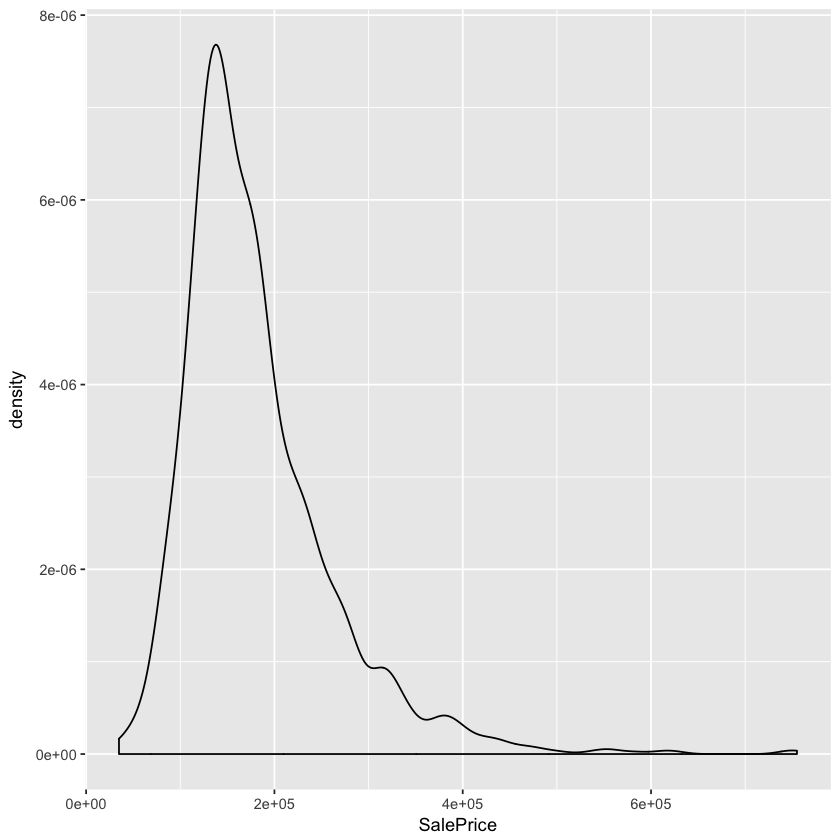

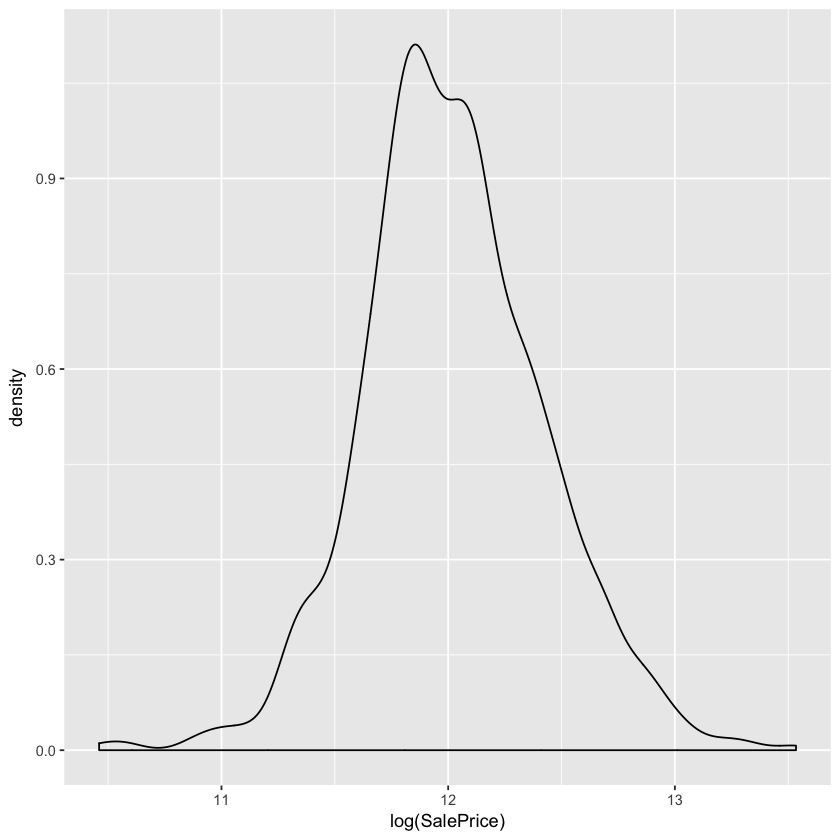

In [4]:
ggplot(reqd.train.file, aes(SalePrice))+geom_density()
ggplot(reqd.train.file, aes(log(SalePrice)))+geom_density()


target.var = as.data.frame(reqd.train.file$SalePrice)
target.var$log.SalePrice = log(reqd.train.file$SalePrice)
reqd.train.file$SalePrice = NULL

Var1,Freq
C (all),0.6849315
FV,4.4520548
RH,1.0958904
RL,78.8356164
RM,14.9315068


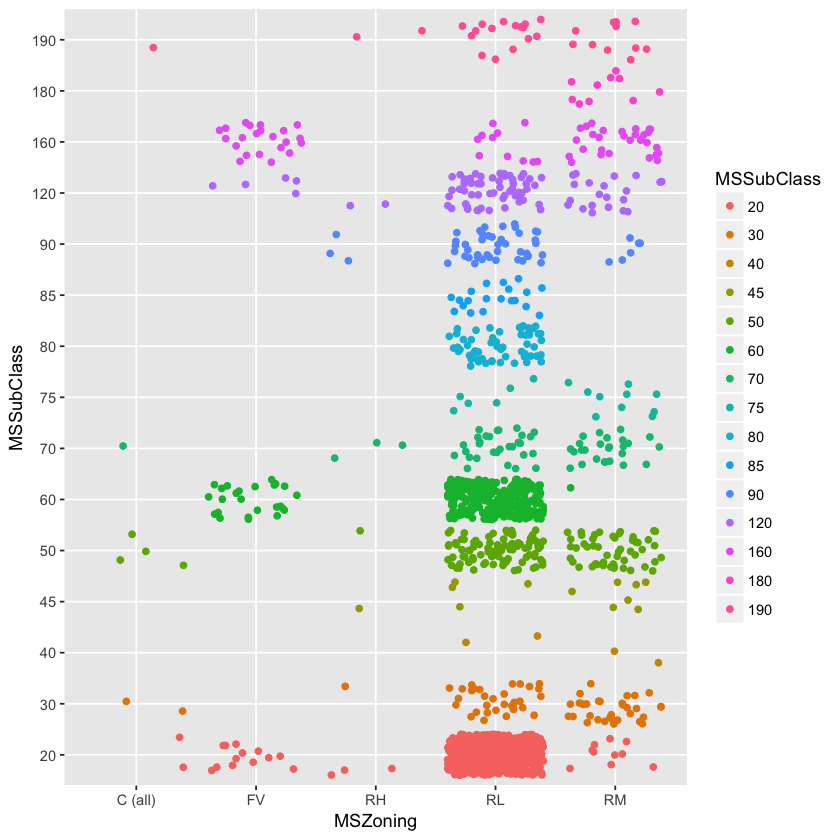

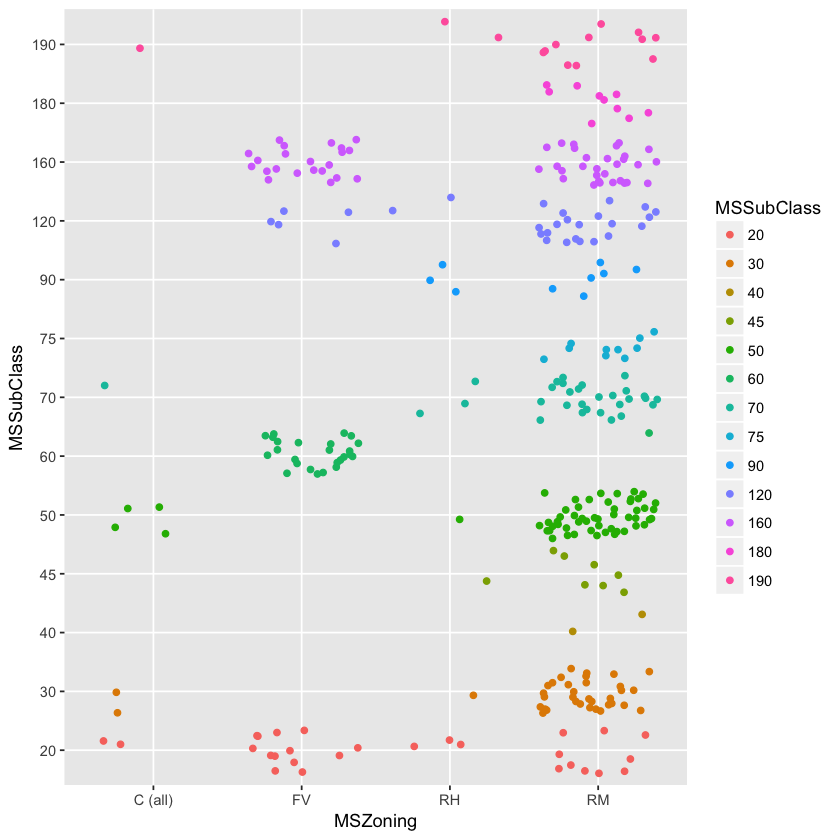

In [5]:
reqd.train.file$MSSubClass  = as.factor(reqd.train.file$MSSubClass )
# ggplot(train.file, aes(MSZoning,MSSubClass))+geom_jitter((aes(colour = MSZoning)))
ggplot(reqd.train.file, aes(MSZoning,MSSubClass))+geom_jitter((aes(colour = MSSubClass)))
# aggregate(log.SalePrice ~ MSZoning, data = reqd.train.file, FUN = length)
as.data.frame(prop.table(table(reqd.train.file$MSZoning))*100)
ggplot(reqd.train.file[reqd.train.file$MSZoning!="RL",], aes(MSZoning,MSSubClass))+geom_jitter((aes(colour = MSSubClass)))

## Input to Target Variables 
Checking the relationships between the input variables with the target variables and multi collinearity

### Contionous Variables
Get correlations of all Contionous Variables with the Target varaible

In [6]:
i = 1
# ncol(reqd.train.file)
integerVar = NULL
for(i in 1:ncol(reqd.train.file)){
#     print(i)
    if(is.integer(reqd.train.file[,i]) || is.numeric(reqd.train.file[,i])){
#         print("Yes")
        integerVar = c(integerVar,i)
    }
}
reqd.train.file[,integerVar]

LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal
65,8450,196,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0
80,9600,0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0
68,11250,162,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0
60,9550,0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0
84,14260,350,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0
85,14115,0,732,0,64,796,796,566,0,1362,480,40,30,0,320,0,0,700
75,10084,186,1369,0,317,1686,1694,0,0,1694,636,255,57,0,0,0,0,0
NA,10382,240,859,32,216,1107,1107,983,0,2090,484,235,204,228,0,0,0,350
51,6120,0,0,0,952,952,1022,752,0,1774,468,90,0,205,0,0,0,0
50,7420,0,851,0,140,991,1077,0,0,1077,205,0,4,0,0,0,0,0


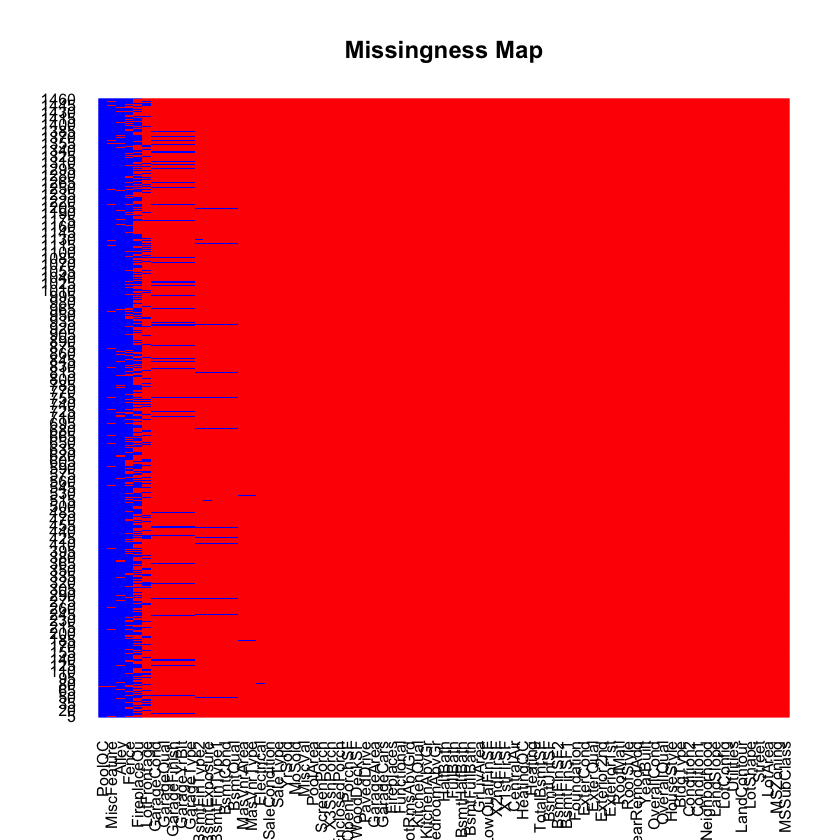

In [7]:
missmap(reqd.train.file,col=c("blue","red"), legend = F)